## K Nearest neighbors

### Визуализация решающих поверхностей в kNN.

Здесь будет изображены решающие поверхности для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будет использован встроенный в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
print(X.head(8))
print(y)

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

Пропущенные значения в каждом признаке отсутствуют. Каждый признак имеет тип переменных float, что говорит о наличии только числовых значений в таблице

In [4]:
from sklearn.model_selection import train_test_split # импортирую модуль train_test_split из sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20) # разделяю выборку на тренировочную и тестовую выборку в соотношении 30:70

На тренировочной выборке будет обучено шесть классификаторов kNN, отличающихся только числом соседей.

Сначала нормализую данные

In [5]:
from sklearn import preprocessing # импортирую модуль preproccessing
normalizer = preprocessing.StandardScaler() # назначаю объектом класса normalizer
norm = normalizer.fit(X_train[["alcohol","magnesium"]]) # обучаю normalizer на тренировочной выборке
X_norm_train = norm.transform(X_train[["alcohol","magnesium"]]) # нормализую данные по признакам alcohol и magnesium
X_norm_am_train = pd.DataFrame(X_norm_train) # форматирую матрицу
print(X_norm_am_train.head())

          0         1
0  0.265033  1.278829
1  0.712947 -0.597003
2  1.045682 -1.400931
3 -1.309064 -1.400931
4 -0.016513 -0.195039


In [6]:
X_norm_test = norm.transform(X_test[["alcohol","magnesium"]]) # нормализую данные по признакам alcohol и magnesium
X_norm_am_test = pd.DataFrame(X_norm_test) # форматирую матрицу
print(X_norm_am_test.head())

          0         1
0 -0.694782 -0.864979
1  1.365621 -0.329027
2  1.685559  0.072937
3 -1.667395  0.139931
4 -1.360254 -0.998967


Теперь перехожу к обучению kNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier # импортирую KNeighborsClassifier 
from sklearn.metrics import accuracy_score

print("\t\t\t\t\t","Test", "Train")
y_clss_1 = KNeighborsClassifier(n_neighbors = 1, metric = "euclidean")
y_std_1 = y_clss_1.fit(X_norm_am_train, y_train) # knn с 1 ближайщим соседом; передаю тренировочную выборку для обучения
print("Accurace for neighbors = 1:",accuracy_score(y_test, y_std_1.predict(X_norm_am_test)), accuracy_score(y_train, y_std_1.predict(X_norm_am_train))) #  передаю тестовую и тренировочную выборки для проверки точности

y_clss_3 = KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
y_std_3 = y_clss_3.fit(X_norm_am_train, y_train) # knn с 3 ближайщим соседом; передаю тренировочную выборку для обучения
print("Accurace for neighbors = 3:",accuracy_score(y_test, y_std_3.predict(X_norm_am_test)), accuracy_score(y_train, y_std_3.predict(X_norm_am_train))) #  передаю тестовую и тренировочную выборки для проверки точности

y_clss_5 = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
y_std_5 = y_clss_5.fit(X_norm_am_train, y_train) # knn с 5 ближайщим соседом; передаю тренировочную выборку для обучения
print("Accurace for neighbors = 5:",accuracy_score(y_test, y_std_5.predict(X_norm_am_test)), accuracy_score(y_train, y_std_5.predict(X_norm_am_train)))  #  передаю тестовую и тренировочную выборки для проверки точности

y_clss_10 = KNeighborsClassifier(n_neighbors = 10, metric = "euclidean")
y_std_10 = y_clss_10.fit(X_norm_am_train, y_train) # knn с 10 ближайщим соседом; передаю тренировочную выборку для обучения
print("Accurace for neighbors = 10:",accuracy_score(y_test, y_std_10.predict(X_norm_am_test)), accuracy_score(y_train, y_std_10.predict(X_norm_am_train)))  #  передаю тестовую и тренировочную выборки для проверки точности

y_clss_15 = KNeighborsClassifier(n_neighbors = 15, metric = "euclidean")
y_std_15 = y_clss_15.fit(X_norm_am_train, y_train) # knn с 15 ближайщим соседом; передаю тренировочную выборку для обучения
print("Accurace for neighbors = 15:",accuracy_score(y_test, y_std_15.predict(X_norm_am_test)), accuracy_score(y_train, y_std_15.predict(X_norm_am_train)))  #  передаю тестовую и тренировочную выборки для проверки точности

y_clss_25 = KNeighborsClassifier(n_neighbors = 25, metric = "euclidean")
y_std_25 = y_clss_25.fit(X_norm_am_train, y_train) # knn с 25 ближайщим соседом; передаю тренировочную выборку для обучения
print("Accurace for neighbors = 25",accuracy_score(y_test, y_std_25.predict(X_norm_am_test)), accuracy_score(y_train, y_std_25.predict(X_norm_am_train)))  #  передаю тестовую и тренировочную выборки для проверки точности

clss = [y_clss_1, y_clss_3, y_clss_5, y_clss_10, y_clss_15, y_clss_25]

					 Test Train
Accurace for neighbors = 1: 0.6296296296296297 1.0
Accurace for neighbors = 3: 0.6481481481481481 0.8709677419354839
Accurace for neighbors = 5: 0.6666666666666666 0.8629032258064516
Accurace for neighbors = 10: 0.7222222222222222 0.7661290322580645
Accurace for neighbors = 15: 0.7407407407407407 0.7419354838709677
Accurace for neighbors = 25 0.7407407407407407 0.7419354838709677


In [8]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import mlxtend

Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. 




Импортирую необходимые библиотеки и методы

In [10]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

Строю графики

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

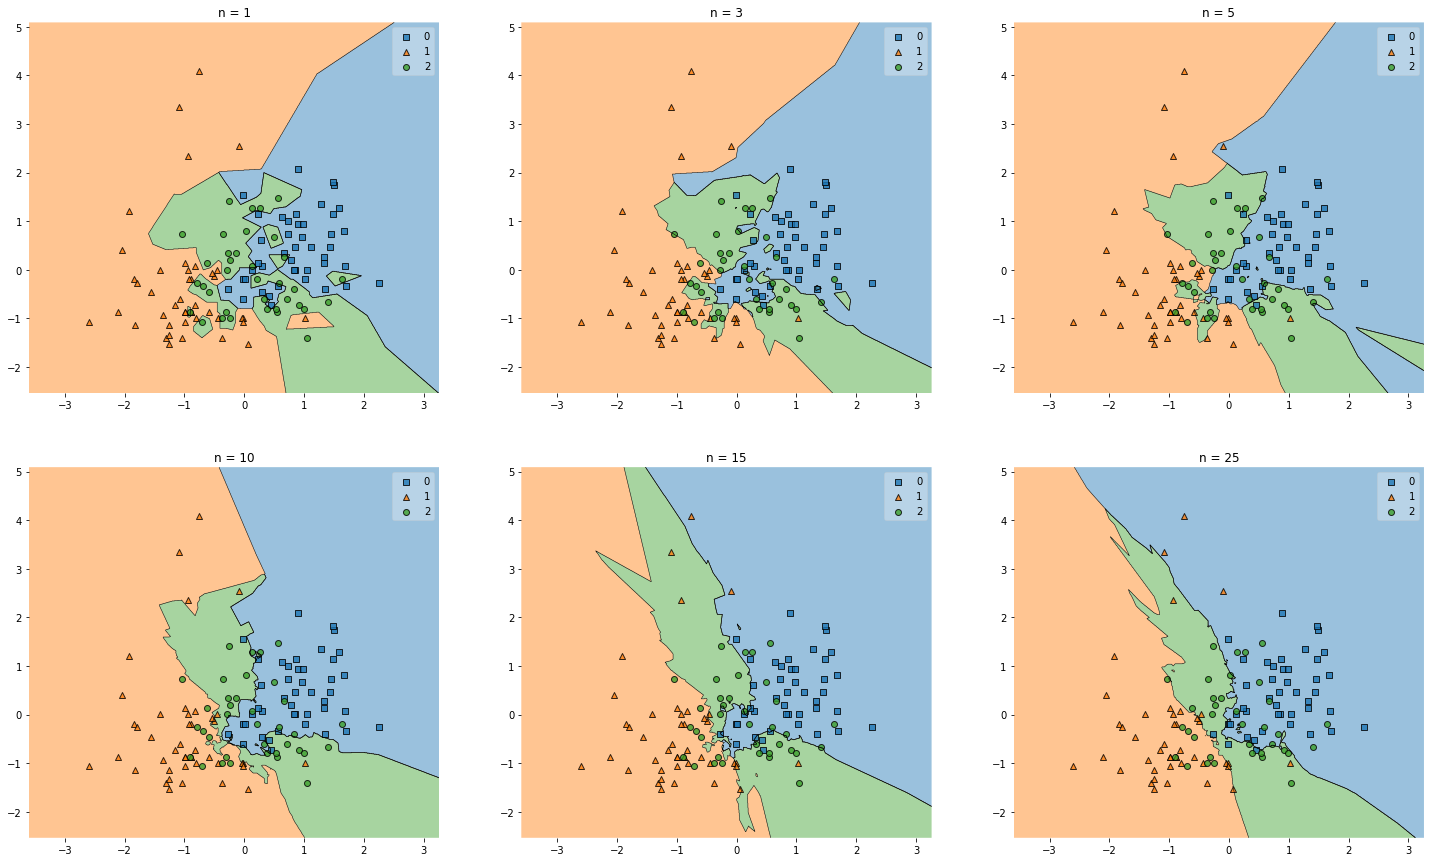

In [11]:
gs = gridspec.GridSpec(2, 3) # определяю размерность сетки

fig = plt.figure(figsize=(25,15)) # определяю размер шаблона

labels = ['n = 1', 'n = 3', 'n = 5', 'n = 10', 'n = 15', 'n = 25'] # названия классификаторов
for clf, lab, grd in zip(clss,
                         labels,
                         itertools.product([0, 1, 2], repeat = 2)):

    ax = plt.subplot(gs[grd[0], grd[1]]) # определяю место графика
    fig = plot_decision_regions(X = np.array(X_norm_am_train), y = np.array(y_train), clf = clf) 
    plt.title(lab)

plt.show()

Accurace for neighbors = 1: 0.63
Accurace for neighbors = 3: 0.65
Accurace for neighbors = 5: 0.67
Accurace for neighbors = 10: 0.72
Accurace for neighbors = 15: 0.74
Accurace for neighbors = 25 0.74

Видно, что лучше всего на тестовой выборке получаются результаты для количества соседей k = 15, k = 25 и k = 10. Хуже всего же на тестовой выборке работает модель с k = 1. Из графиков же видно, что при использовании малых  𝑘(= 1, = 3, = 5)  разделяющая поверхность слишком сложная, на нее оказывают сильное воздействие шумовые объекты. Далее поверхность становится все ровнее и при  𝑘 = 15  выглядит наиболее разумно. 


### Еще один пример работы knn

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

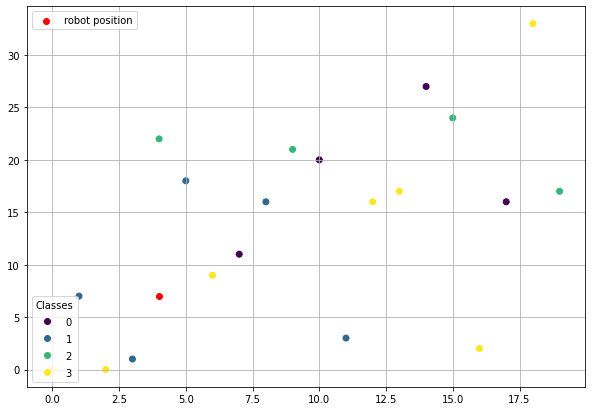

In [12]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        
        self.k = k
        self.initial_position = initial_position.reshape(1,2)
        self.landmarks = landmarks
        self.classes = classes
        
        
        self.trajectory = [self.initial_position] # создаю массив с первым элементом расположения робота
        
        self.knn = KNeighborsClassifier(n_neighbors = self.k, metric = "euclidean").fit(pd.DataFrame(self.landmarks),self.classes)  # обучаю knn на расположении классов и классами и предсказываю по расположению робота
        
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]), 
                        2: np.array([0, 1]), 
                        3: np.array([0, -1])}
    
    def move(self):
        if(np.random.binomial(n = 1, p=0.2) == 1): # с вероятностью 0.2 будет произведен код ниже
            self.initial_position = self.initial_position + [1,0] # сдвигаю положение робота вправо
            self.trajectory.append(self.initial_position) # запоминаю положение робота
        else: # с вероятностью 0.8 будет произведен код ниже
            knn = self.knn.predict(self.initial_position)
            self.initial_position = self.initial_position + self.mapping[knn[0]] # сдвигаю положение робота в соответствующее положение класса
            self.trajectory.append(self.initial_position) # запоминаю положение робота
            

In [15]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = [[],[]] # создаю двумерный массив
    for z in robot.trajectory:
        x = z[0][0]
        y = z[0][1]
        traj[0].append(x) # записываю значение оси абсцисс
        traj[1].append(y) # записываю значение оси ординат
    traj = np.array(traj).T
    
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')
    
    plt.plot()
    _ = plt.legend()
    _ = plt.grid()
    

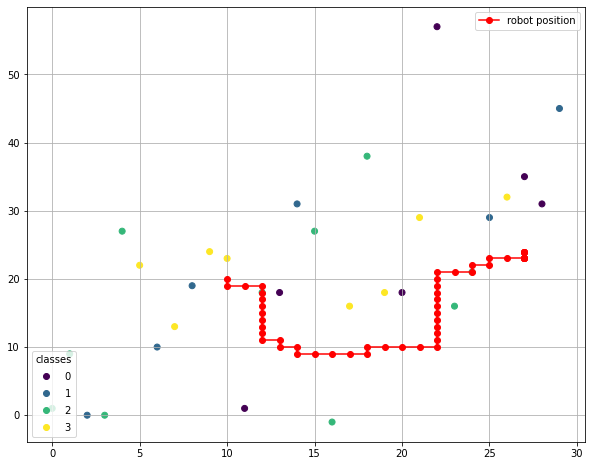

In [16]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

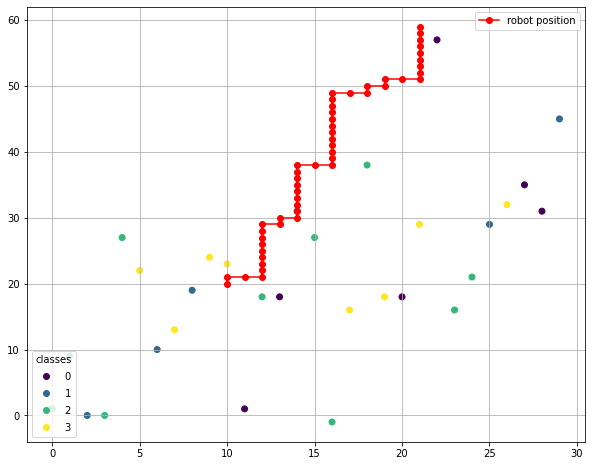

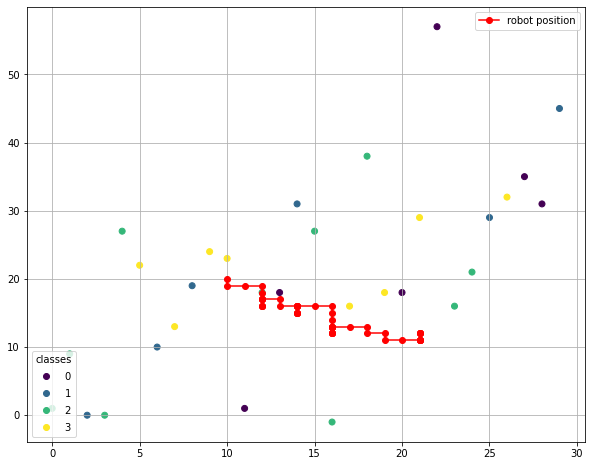

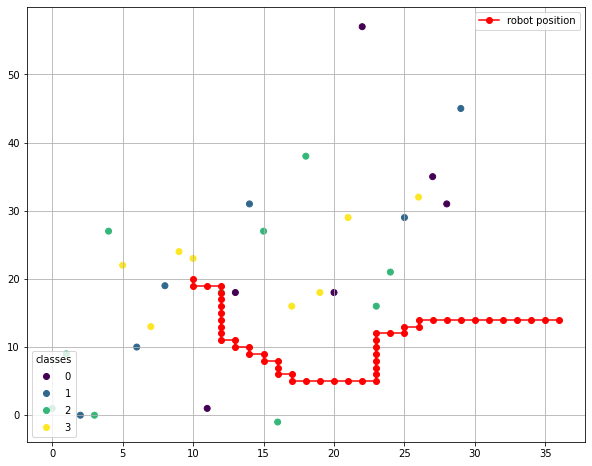

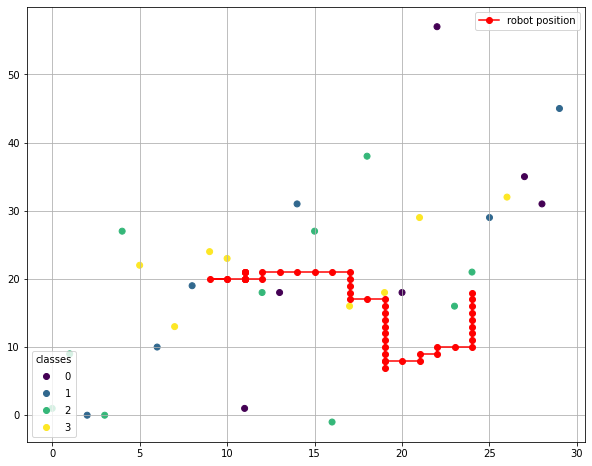

In [17]:
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50) # движение робота для k = 10
conduct_experiment(x, mean = 3, std = 10, k = 20, n_movements = 50) # движение робота для k = 5
conduct_experiment(x, mean = 3, std = 10, k = 7, n_movements = 50) # движение робота для k = 6
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50) # движение робота для k = 1

При большом k робот подвержен влиянию самого большого класса(зеленого) и идет наверх. При k = 20 он наиболее окружен желтым классом, поэтому его движение в основном направлено вниз. При самом малом количестве соседей k = 1 робот ходит довольно неразборчиво. Если бы метки назнаались осмысленно, то можно было бы знать, куда идет робот.